<a href="https://colab.research.google.com/github/KellieLeonard-Biostat/BreastcancerML/blob/main/Breast_Cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data** **Preprocessing** **& Feature** **Engineering**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_breast_cancer

# Loaded dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Selected features related to nuclei size and shape
size_shape_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
X = df[size_shape_features]
y = df['target']

# Checked the dataset
print("Dataset shape:", X.shape)
print(df.head())


Dataset shape: (569, 5)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wors

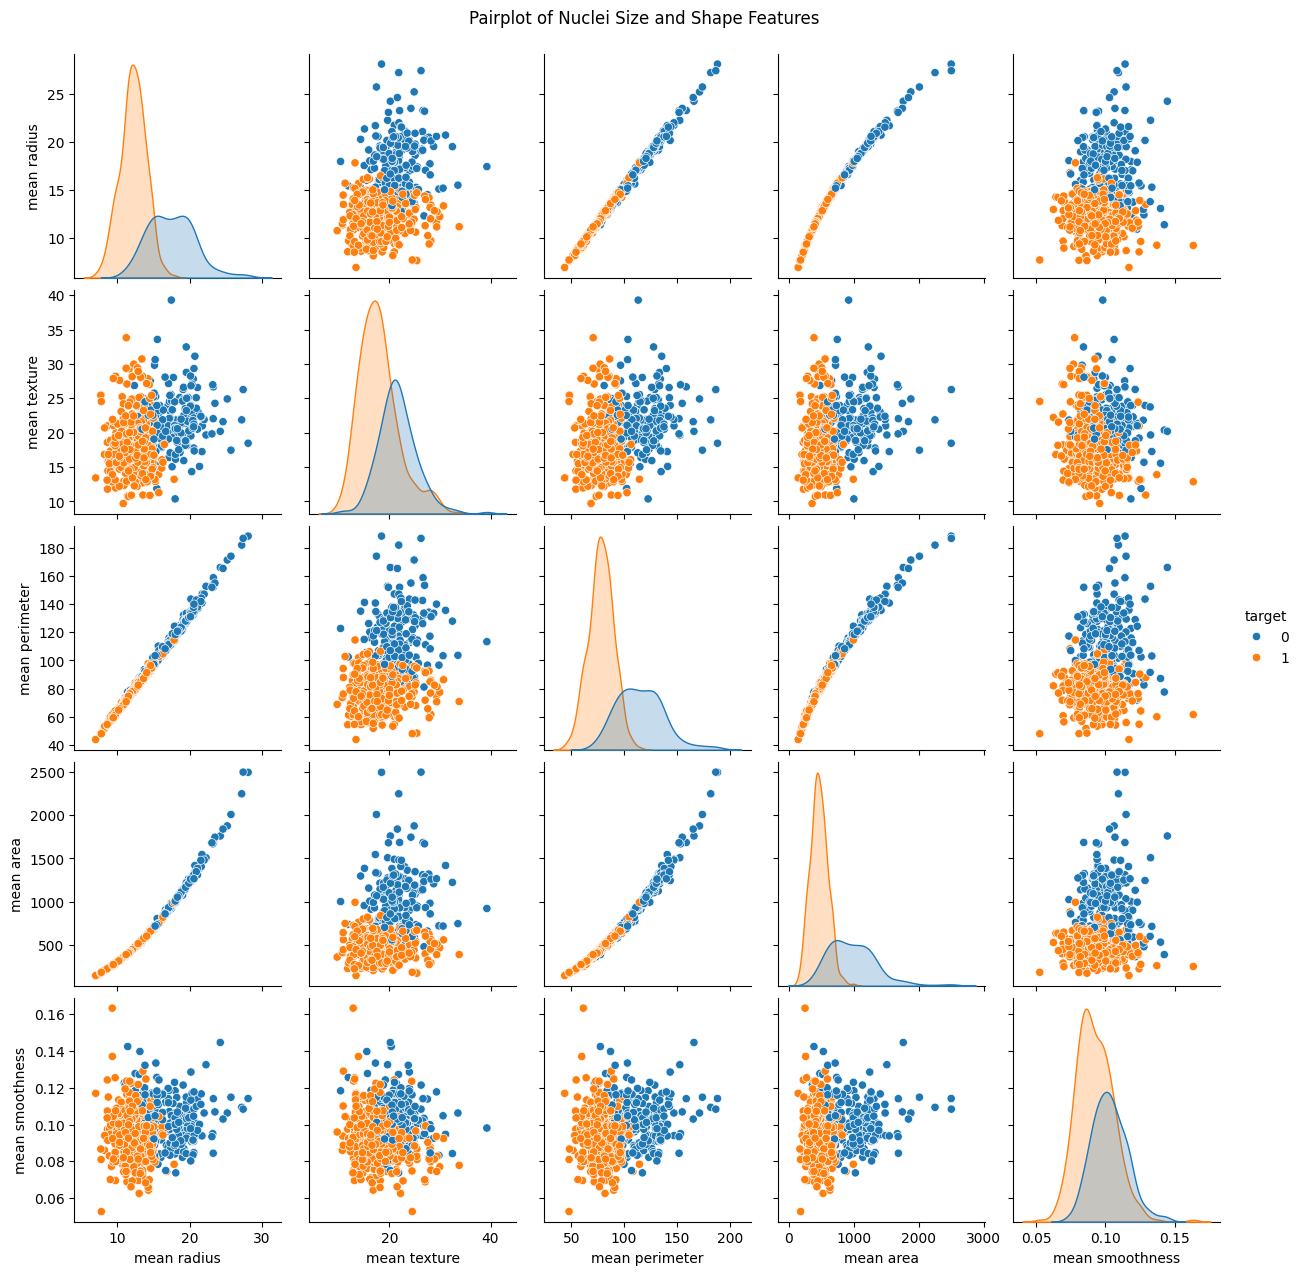

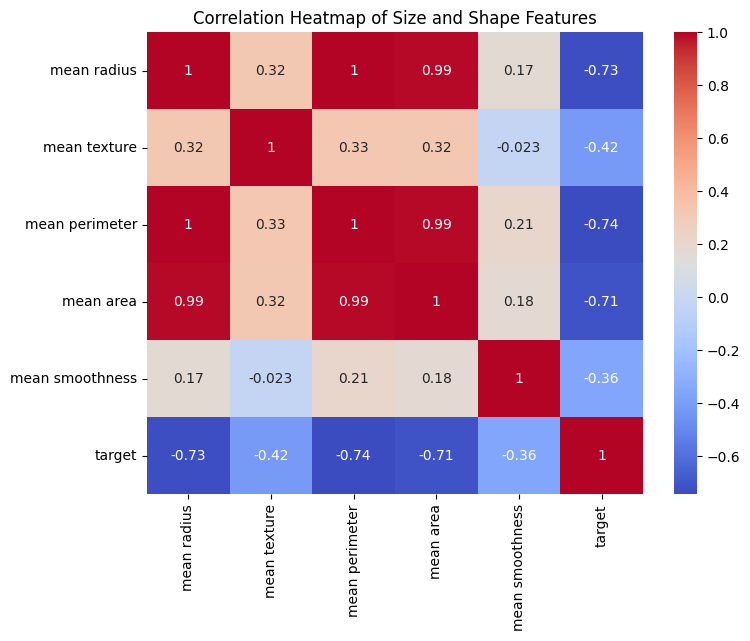

In [ ]:
# Pairplot of size and shape features colored by the target
sns.pairplot(df, vars=size_shape_features, hue='target', diag_kind='kde')
plt.suptitle("Pairplot of Nuclei Size and Shape Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[size_shape_features + ['target']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Size and Shape Features")
plt.show()


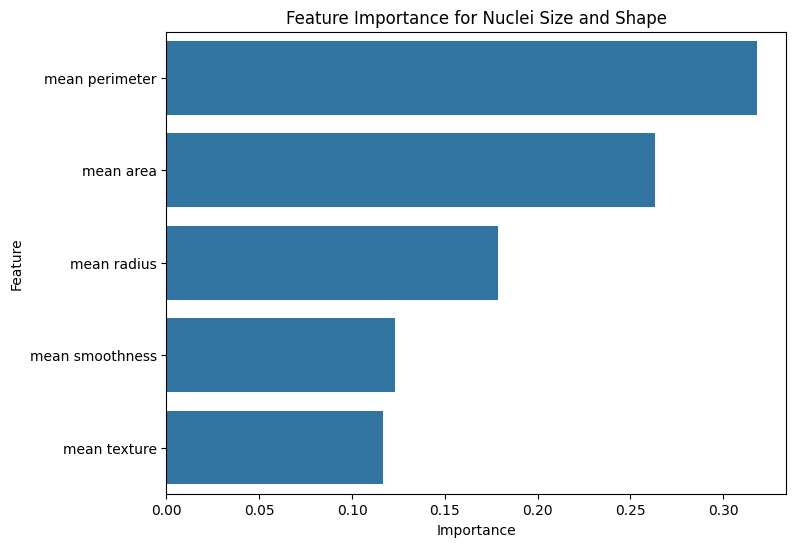

In [ ]:
# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': size_shape_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance for Nuclei Size and Shape")
plt.show()


# **Model Training & Hyperparameter Tuning**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaled the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Trained a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Made predictions
y_pred = model.predict(X_test)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Grid search for best parameters
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best Random Forest Model
best_rf = rf_grid.best_estimator_
print("Best RF Parameters:", rf_grid.best_params_)


Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [22]:
from sklearn.neural_network import MLPClassifier

# Define parameter grid
mlp_params = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (256, 128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}

# Grid search for best parameters
mlp = MLPClassifier(solver='adam', random_state=42)
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, scoring='roc_auc', n_jobs=-1)

# Assign the scaled training data to X_train_scaled
X_train_scaled = X_train  # Assuming X_train is already scaled

# Fit the model using X_train_scaled
mlp_grid.fit(X_train_scaled, y_train)

# Best MLP Model
best_mlp = mlp_grid.best_estimator_
print("Best MLP Parameters:", mlp_grid.best_params_)

Best MLP Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 500}


# **Model Evaluation & Performance Metrics**

In [25]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict using best models
rf_preds = best_rf.predict(X_test)
rf_probs = best_rf.predict_proba(X_test)[:, 1]  # Probability estimates for AUC

mlp_preds = best_mlp.predict(X_test)
mlp_probs = best_mlp.predict_proba(X_test)[:, 1]  # Probability estimates for AUC

# Print classification reports
print("Random Forest Performance:")
print(classification_report(y_test, rf_preds))
print("AUC-ROC:", roc_auc_score(y_test, rf_probs))

print("\nMLP Performance:")
print(classification_report(y_test, mlp_preds))
print("AUC-ROC:", roc_auc_score(y_test, mlp_probs))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.94      0.92      0.93        71

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

AUC-ROC: 0.971830985915493

MLP Performance:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.93      0.93      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

AUC-ROC: 0.971830985915493


In [32]:
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

# Predictions & Probabilities
rf_preds = best_rf.predict(X_test)
rf_probs = best_rf.predict_proba(X_test)[:, 1]  # Probability estimates for AUC

mlp_preds = best_mlp.predict(X_test)
mlp_probs = best_mlp.predict_proba(X_test)[:, 1]  # Probability estimates for AUC

# Compute Metrics
metrics = {
    "Model": ["Random Forest", "MLP"],
    "Accuracy": [best_rf.score(X_test, y_test), best_mlp.score(X_test, y_test)],
    "Precision": [precision_score(y_test, rf_preds), precision_score(y_test, mlp_preds)],
    "Recall": [recall_score(y_test, rf_preds), recall_score(y_test, mlp_preds)],
    "F1-Score": [f1_score(y_test, rf_preds), f1_score(y_test, mlp_preds)],
    "ROC-AUC": [roc_auc_score(y_test, rf_probs), roc_auc_score(y_test, mlp_probs)],
}

# Convert to DataFrame for better visualization
import pandas as pd
df_metrics = pd.DataFrame(metrics)
print(df_metrics)


           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Random Forest  0.912281   0.942029  0.915493  0.928571  0.971831
1            MLP  0.912281   0.929577  0.929577  0.929577  0.971831


# **Visualisation**

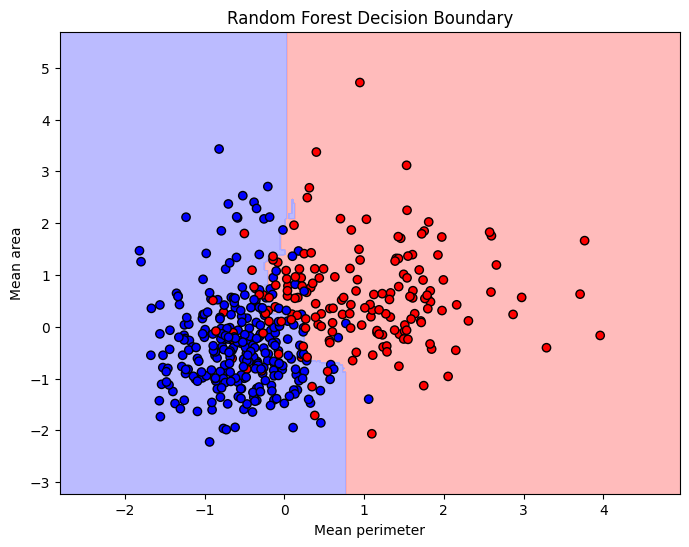

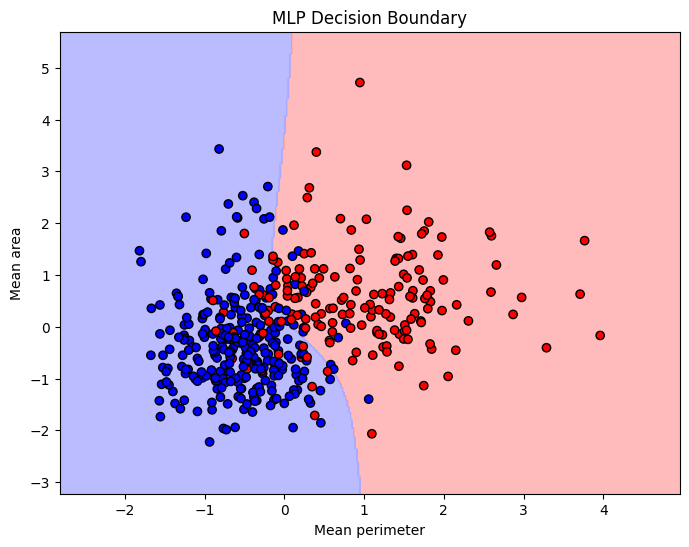

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title)
    plt.xlabel("Mean perimeter")
    plt.ylabel("Mean area")
    plt.show()

# Use only first 2 features for visualization
plot_decision_boundary(best_rf, X_train[:, :2], y_train, "Random Forest Decision Boundary")
plot_decision_boundary(best_mlp, X_train_scaled[:, :2], y_train, "MLP Decision Boundary")


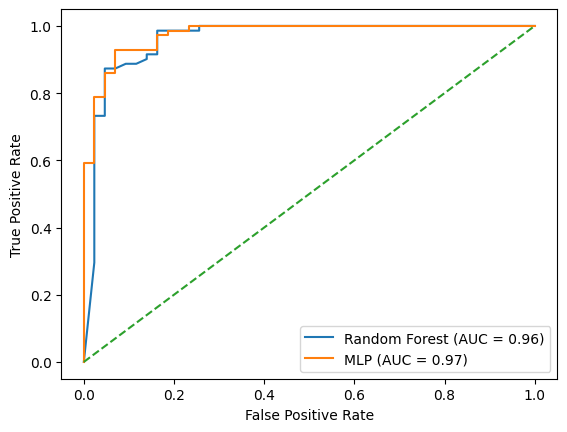

In [47]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Plot ROC Curve
def plot_roc(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure()
plot_roc(best_rf, X_test, y_test, 'Random Forest') # Changed rf_model to best_rf
plot_roc(best_mlp, X_test, y_test, 'MLP') # Changed mlp_model to best_mlp
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()